<a href="https://colab.research.google.com/github/mjoevarun1984/Michael-AIML/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')
import datetime

In [96]:
#from google.colab import drive
#drive.mount('/content/drive')
#import os
#os.chdir('/content/drive/My Drive/Notebooks/')

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# reading the raw file

Covid_df = pd.read_csv('/content/drive/My Drive/Brazil_Covid.csv')



In [100]:
Covid_df.shape

(5644, 111)

In [101]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 


  
#Covid_df['SARS-Cov-2 exam result']= le.fit_transform(Covid_df['SARS-Cov-2 exam result']) 
Covid_df['SARS-Cov-2 exam result']= le.fit_transform(Covid_df['SARS-Cov-2 exam result']) 
#Covid_df['Urine - Color']= le.fit_transform(Covid_df['Urine - Color']) 

#Covid_df['Urine - Hyaline cylinders']= le.fit_transform(Covid_df['Urine - Hyaline cylinders']) 



#Covid_df['Respiratory Syncytial Virus']=le.fit_transform(Covid_df['Respiratory Syncytial Virus']) 

#Covid_df['Respiratory Syncytial Virus']= Covid_df['Respiratory Syncytial Virus'].str.replace("not_detected","0")
#Covid_df['Respiratory Syncytial Virus']= Covid_df['Respiratory Syncytial Virus'].str.replace("detected","1")



        #Covid_df[feature] = Covid_df[feature].str.replace("Urato Amorfo --+","2") # Replace object to numeric
        #Covid_df[feature] = Covid_df[feature].str.replace("Urato Amorfo +++","3")
       # Covid_df[feature] = Covid_df[feature].str.replace("Oxalato de Cálcio -++","4")       
       
        
        
        
        
        
        

In [102]:
for feature in Covid_df.columns: # Loop through all columns in the dataframe
    if Covid_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        Covid_df[feature] = Covid_df[feature].str.replace("not_detected","0") # Replace object to numeric
        Covid_df[feature] = Covid_df[feature].str.replace("detected","1")
        Covid_df[feature] = Covid_df[feature].str.replace("negative","0") # Replace object to numeric
        Covid_df[feature] = Covid_df[feature].str.replace("positive","1")
        Covid_df[feature] = Covid_df[feature].str.replace("absent","0") # Replace object to numeric
        Covid_df[feature] = Covid_df[feature].str.replace("not_done","1")
        Covid_df[feature] = Covid_df[feature].str.replace("present","2")
        Covid_df[feature] = Covid_df[feature].str.replace("altered_coloring","4") # Replace object to numeric
        Covid_df[feature] = Covid_df[feature].str.replace("clear","3")
        Covid_df[feature] = Covid_df[feature].str.replace("lightly_cloudy","5") # Replace object to numeric
        Covid_df[feature] = Covid_df[feature].str.replace("cloudy","6")
        Covid_df[feature] = Covid_df[feature].str.replace("normal","7") 
        Covid_df[feature] = Covid_df[feature].str.replace("citrus_yellow","11")
        Covid_df[feature] = Covid_df[feature].str.replace("light_yellow","8") 
        Covid_df[feature] = Covid_df[feature].str.replace("yellow","9") 
        Covid_df[feature] = Covid_df[feature].str.replace("orange","10")
        Covid_df[feature] = Covid_df[feature].str.replace("Não Realizado","0") 
        Covid_df[feature] = Covid_df[feature].str.replace("<1000","999") 
        #Covid_df[feature] = Covid_df[feature].str.replace("Ausentes","1")  

In [103]:
Covid_df['SARS-Cov-2 exam result'].head(5000)

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: SARS-Cov-2 exam result, Length: 5000, dtype: int64

In [104]:
Covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(5), object(36)
memory usage: 4.8+ MB


In [105]:
Covid_df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [106]:
#print the count of the values
Covid_df['SARS-Cov-2 exam result'].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

# Inference

1)we are seeing lot of feature which does not have any data there is no point is using those feture for our model and hence dropping those.

2)Hemoglobin play a vital part in blood and there are lot of records which do not have a preopr value. hence dropping those records

3) Albumin,Vitamin B12,Ferritin,Phosphor,Urine - Nitrite,Urine - Ketone Bodies and Ionized calcium has valid value for less significaton records and more null value and does not make sense to impute the null with mean or median



In [107]:
#creating a new datset with non misisng values
#CovidNew_df=Covid_df.dropna()

#Covid_df_NEW=Covid_df[Covid_df.columns[Covid_df.isnull().sum() = 25]]
# creating a new datset which removes all the columns which 


#Covid_df_new = Covid_df.dropna(axis=1)
Covid_df_new = Covid_df.dropna(how='all')
Covid_df_new = Covid_df_new.dropna(how='all',axis=1)

#df1 = df.dropna(how='all', axis=1)
#print(df1)

In [108]:
Covid_df_new = Covid_df_new.dropna(axis=0, subset=['Hemoglobin'])

In [116]:
Covid_df_new.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.619086,1.198059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.127395,-0.067309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.089481,0.296546,0.907723,NaN,-0.267856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.880570,-0.811643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000994,-0.042972,-0.792007,NaN,-0.240915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.265957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.837191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.422410,-1.332677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
Covid_df_new.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=106)

In [117]:
Covid_df_new = Covid_df_new.drop(["Albumin","Ferritin","Lipase dosage","Vitamin B12","Urine - Crystals","Phosphor","Urine - Nitrite","Urine - Ketone Bodies","Magnesium","ionized calcium","Fio2 (venous blood gas analysis)","Strepto A"],axis = 1)

KeyError: ignored

In [51]:
#print the count of the values
Covid_df_new.shape

(603, 96)

In [52]:
Covid_df_new.isnull().sum()

Patient ID                                                 0
Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
                                                        ... 
Total CO2 (arterial blood gas analysis)                  576
HCO3 (arterial blood gas analysis)                       576
pO2 (arterial blood gas analysis)                        576
Arteiral Fio2                                            583
ctO2 (arterial blood gas analysis)                       576
Length: 96, dtype: int64

# Handling null value

There are Total of 558 Postive case and 5086 negative case . we have many miisng values and to handle it let create datset for positive and negative seperatly and handle it. As Hemoglobin forms a a vital stats we cant not input it with mean and median and hence ignoring those records.

In [53]:
Covid_df_new=Covid_df_new.drop(["Patient ID"],axis = 1)

In [54]:
#X = main_df.drop(['greatstone_rating','fund_id'],axis = 1)
#y = main_df['greatstone_rating']

In [55]:
Covid_Postive_df=Covid_df_new[Covid_df_new['SARS-Cov-2 exam result'] == 1]

In [56]:
Covid_Postive_df.shape

(83, 95)

In [57]:
Covid_Postive_df.isnull().sum()

Patient age quantile                                      0
SARS-Cov-2 exam result                                    0
Patient addmited to regular ward (1=yes, 0=no)            0
Patient addmited to semi-intensive unit (1=yes, 0=no)     0
Patient addmited to intensive care unit (1=yes, 0=no)     0
                                                         ..
Total CO2 (arterial blood gas analysis)                  70
HCO3 (arterial blood gas analysis)                       70
pO2 (arterial blood gas analysis)                        70
Arteiral Fio2                                            74
ctO2 (arterial blood gas analysis)                       70
Length: 95, dtype: int64

In [58]:
Covid_Postive_Regular_df=Covid_Postive_df[Covid_Postive_df['Patient addmited to regular ward (1=yes, 0=no)'] == 1]

In [59]:
Covid_Postive_Regular_df.shape

(27, 95)

In [60]:
Covid_Postive_semi_intensive_df=Covid_Postive_df[Covid_Postive_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1]

In [61]:
Covid_Postive_semi_intensive_df.shape

(8, 95)

In [62]:
Covid_Postive_intensive_df=Covid_Postive_df[Covid_Postive_df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1]

In [63]:
Covid_Postive_intensive_df.shape

(8, 95)

In [64]:
Covid_Postive_Other_df=Covid_Postive_df[(Covid_Postive_df['Patient addmited to regular ward (1=yes, 0=no)'] == 0) &
(Covid_Postive_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 0) &
(Covid_Postive_df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 0)
]



In [65]:
Covid_Postive_Other_df.shape

(40, 95)

In [66]:
def groupMeanValue(group):
    group = group.fillna(group.median())
    return group



In [67]:
Covid_Postive_Other_df = Covid_Postive_Other_df.transform(groupMeanValue)


In [68]:

Covid_Postive_Other_df.loc[:, Covid_Postive_Other_df.isnull().any()]


,Ionized calcium
568,NaN
1108,NaN
1162,NaN
1293,NaN
1494,NaN
1615,NaN
1624,NaN
2205,NaN
2477,NaN
2683,NaN


In [120]:

Covid_Postive_Regular_df = Covid_Postive_Regular_df.transform(groupMeanValue)
Covid_Postive_Regular_df.loc[:, Covid_Postive_Regular_df.isnull().any()]

""
884
3057
3085
4459
4524
4769
4978
5002
5111
5115


In [121]:
Covid_Postive_semi_intensive_df = Covid_Postive_semi_intensive_df.transform(groupMeanValue)
Covid_Postive_semi_intensive_df.loc[:, Covid_Postive_semi_intensive_df.isnull().any()]

,Strepto A
4535,NaN
4863,NaN
4957,NaN
5004,NaN
5009,NaN
5161,NaN
5165,NaN
5250,NaN


In [122]:
Covid_Postive_intensive_df = Covid_Postive_intensive_df.transform(groupMeanValue)
Covid_Postive_intensive_df.loc[:, Covid_Postive_intensive_df.isnull().any()]

""
1966
3818
4897
4899
5017
5169
5196
5226


In [123]:

Covid_Postive_New_df = Covid_Postive_intensive_df.append([Covid_Postive_semi_intensive_df, Covid_Postive_Regular_df,Covid_Postive_Other_df])

In [124]:
Covid_Postive_New_df.shape

(83, 95)

In [126]:
Covid_Postive_New_df = Covid_Postive_New_df.transform(groupMeanValue)
Covid_Postive_New_df.loc[:, Covid_Postive_New_df.isnull().any()]

""
1966
3818
4897
4899
5017
...
5258
5259
5540
5585


In [75]:
Covid_Negative_df=Covid_df_new[Covid_df_new['SARS-Cov-2 exam result'] == 0]

In [76]:
Covid_Negative_df.shape

(520, 95)

In [77]:
Covid_Negative_df.isnull().sum()

Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
Patient addmited to intensive care unit (1=yes, 0=no)      0
                                                        ... 
Total CO2 (arterial blood gas analysis)                  506
HCO3 (arterial blood gas analysis)                       506
pO2 (arterial blood gas analysis)                        506
Arteiral Fio2                                            509
ctO2 (arterial blood gas analysis)                       506
Length: 95, dtype: int64

In [78]:
Covid_Negative_Regular_df=Covid_Negative_df[Covid_Negative_df['Patient addmited to regular ward (1=yes, 0=no)'] == 0]

In [79]:
Covid_Negative_Regular_df.isnull().sum()

Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
Patient addmited to intensive care unit (1=yes, 0=no)      0
                                                        ... 
Total CO2 (arterial blood gas analysis)                  477
HCO3 (arterial blood gas analysis)                       477
pO2 (arterial blood gas analysis)                        477
Arteiral Fio2                                            480
ctO2 (arterial blood gas analysis)                       477
Length: 95, dtype: int64

In [80]:
Covid_Negative_semi_intensive_df=Covid_Negative_df[Covid_Negative_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 0]

In [81]:
Covid_Negative_semi_intensive_df.isnull().sum()

Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
Patient addmited to intensive care unit (1=yes, 0=no)      0
                                                        ... 
Total CO2 (arterial blood gas analysis)                  477
HCO3 (arterial blood gas analysis)                       477
pO2 (arterial blood gas analysis)                        477
Arteiral Fio2                                            478
ctO2 (arterial blood gas analysis)                       477
Length: 95, dtype: int64

In [82]:
Covid_Negative_intensive_df=Covid_Negative_df[Covid_Negative_df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 0]

In [83]:
Covid_Negative_intensive_df.isnull().sum()

Patient age quantile                                       0
SARS-Cov-2 exam result                                     0
Patient addmited to regular ward (1=yes, 0=no)             0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0
Patient addmited to intensive care unit (1=yes, 0=no)      0
                                                        ... 
Total CO2 (arterial blood gas analysis)                  488
HCO3 (arterial blood gas analysis)                       488
pO2 (arterial blood gas analysis)                        488
Arteiral Fio2                                            491
ctO2 (arterial blood gas analysis)                       488
Length: 95, dtype: int64

In [84]:
Covid_Negative_Other_df=Covid_Negative_df[(Covid_Negative_df['Patient addmited to regular ward (1=yes, 0=no)'] == 0) &
(Covid_Negative_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 0) &
(Covid_Negative_df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 0)
]

In [127]:
Covid_Negative_Other_df = Covid_Negative_Other_df.transform(groupMeanValue)
Covid_Negative_Other_df.loc[:, Covid_Negative_Other_df.isnull().any()]

""
1
15
18
22
28
...
5584
5602
5614
5615


In [128]:
Covid_Negative_Regular_df = Covid_Negative_Regular_df.transform(groupMeanValue)

Covid_Negative_Regular_df.loc[:, Covid_Negative_Regular_df.isnull().any()]


""
884
3057
3085
4459
4524
4769
4978
5002
5111
5115


In [129]:
Covid_Negative_intensive_df = Covid_Negative_intensive_df.transform(groupMeanValue)
Covid_Negative_intensive_df.loc[:, Covid_Negative_intensive_df.isnull().any()]

""
1
8
15
18
22
...
5584
5602
5614
5615


In [130]:
Covid_Negative_semi_intensive_df = Covid_Negative_semi_intensive_df.transform(groupMeanValue)
Covid_Negative_semi_intensive_df.loc[:, Covid_Negative_semi_intensive_df.isnull().any()]

""
1
15
18
22
28
...
5584
5602
5614
5615


In [131]:
Covid_Negative_New_df = Covid_Negative_intensive_df.append([Covid_Negative_semi_intensive_df, Covid_Negative_Regular_df,Covid_Negative_Other_df])

In [133]:
Covid_Negative_New_df = Covid_Negative_New_df.transform(groupMeanValue)
Covid_Negative_New_df.loc[:, Covid_Negative_New_df.isnull().any()]

""
1
8
15
18
22
...
5584
5602
5614
5615


In [132]:
Covid_Negative_New_df.shape

(1446, 95)

In [134]:
# combining both positive and negative valida datset

Covid_Input_df = Covid_Negative_New_df.append([Covid_Postive_New_df])




In [92]:
Covid_Input_df.shape

(1529, 95)

In [135]:
Covid_Input_df.loc[:, Covid_Input_df.isnull().any()]

""
1
8
15
18
22
...
5258
5259
5540
5585


In [ ]:
sns.pairplot(Covid_Input_df, diag_kind='kde',hue = 'SARS-Cov-2 exam result') # plotting pairplot to understand bi / multilinearlity if any.

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f53923bff28> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#Plotting the correlation
Covid_Input_df.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.142578,0.150312,0.038117,-0.042394,0.092843,0.058821,-0.164264,0.101450,-0.035821,-0.102291,-0.111772,-0.153669,0.088596,0.191545,0.011512,0.269375,0.055154,0.173420,0.141461,0.061393,0.266303,0.082178,0.276218,0.017911,-0.019294,0.076617,0.030810,0.117086,0.065368,0.132980,0.010717,-0.232095,-0.204409,-0.102505,0.082195,-0.037048,0.274528,-0.018681,NaN,0.236159,0.137795,0.242190,-0.032959,0.143728,0.036824,0.034440,0.009950,NaN,-0.044944,0.038955,-0.021933,-0.007802,0.016533,-0.065764,-0.026643,0.022149,-0.112679,-0.006612,0.071945,-0.089384,-0.078725,0.015324,-0.070152,0.057115
SARS-Cov-2 exam result,0.142578,1.000000,0.332113,0.033756,0.068710,0.088074,0.088140,-0.290625,0.120984,0.115020,-0.002547,0.021408,-0.294530,-0.074820,-0.044013,-0.191035,-0.060841,0.194554,-0.019158,0.026316,-0.053559,-0.090655,0.066312,0.051898,-0.062579,-0.072445,0.093306,0.126152,0.188907,-0.167484,-0.190205,-0.095532,0.032538,-0.817697,-0.399372,0.234230,0.085469,0.114467,0.102563,NaN,0.144328,-0.031751,0.150338,0.417172,0.550839,-0.011588,-0.036664,-0.027875,NaN,-0.635341,-0.017863,0.233065,0.057749,0.179609,-0.045435,0.536319,0.453096,-0.596761,-0.520765,0.176011,-0.855998,-0.804603,0.641811,-0.139123,-0.243994
"Patient addmited to regular ward (1=yes, 0=no)",0.150312,0.332113,1.000000,-0.066139,-0.054634,-0.109485,-0.113795,-0.194770,-0.016261,-0.067699,-0.109939,-0.039009,-0.095272,0.022157,-0.059841,-0.095458,-0.047260,-0.005845,0.122114,0.106491,0.133829,0.024289,0.203479,0.115525,-0.035299,-0.099575,0.045052,0.028447,0.141468,0.013088,0.027932,0.024786,-0.025472,-0.554100,-0.267702,-0.141358,-0.089670,0.140475,-0.028730,NaN,0.016861,0.244468,0.030224,-0.015087,0.166400,-0.010019,-0.005853,-0.024101,NaN,-0.024185,-0.004663,0.102131,-0.105332,0.247564,-0.031416,-0.193243,0.193906,-0.184016,-0.112750,-0.049487,-0.267474,-0.245438,0.048100,-0.046313,0.349823
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.038117,0.033756,-0.066139,1.000000,-0.031742,-0.144608,-0.140325,0.008432,-0.019257,-0.108068,-0.086248,-0.018525,0.115575,-0.101103,-0.043531,-0.068259,-0.040610,-0.030448,0.075957,0.145225,0.052921,0.078654,0.211901,-0.020864,-0.002190,-0.112281,0.035580,0.090684,0.162001,0.051955,0.049963,0.041268,0.183265,-0.039163,0.106176,-0.177982,0.156100,-0.012751,0.220242,NaN,-0.115470,0.161777,-0.103630,0.096821,-0.005314,0.151488,0.168221,0.261198,NaN,-0.038058,0.1

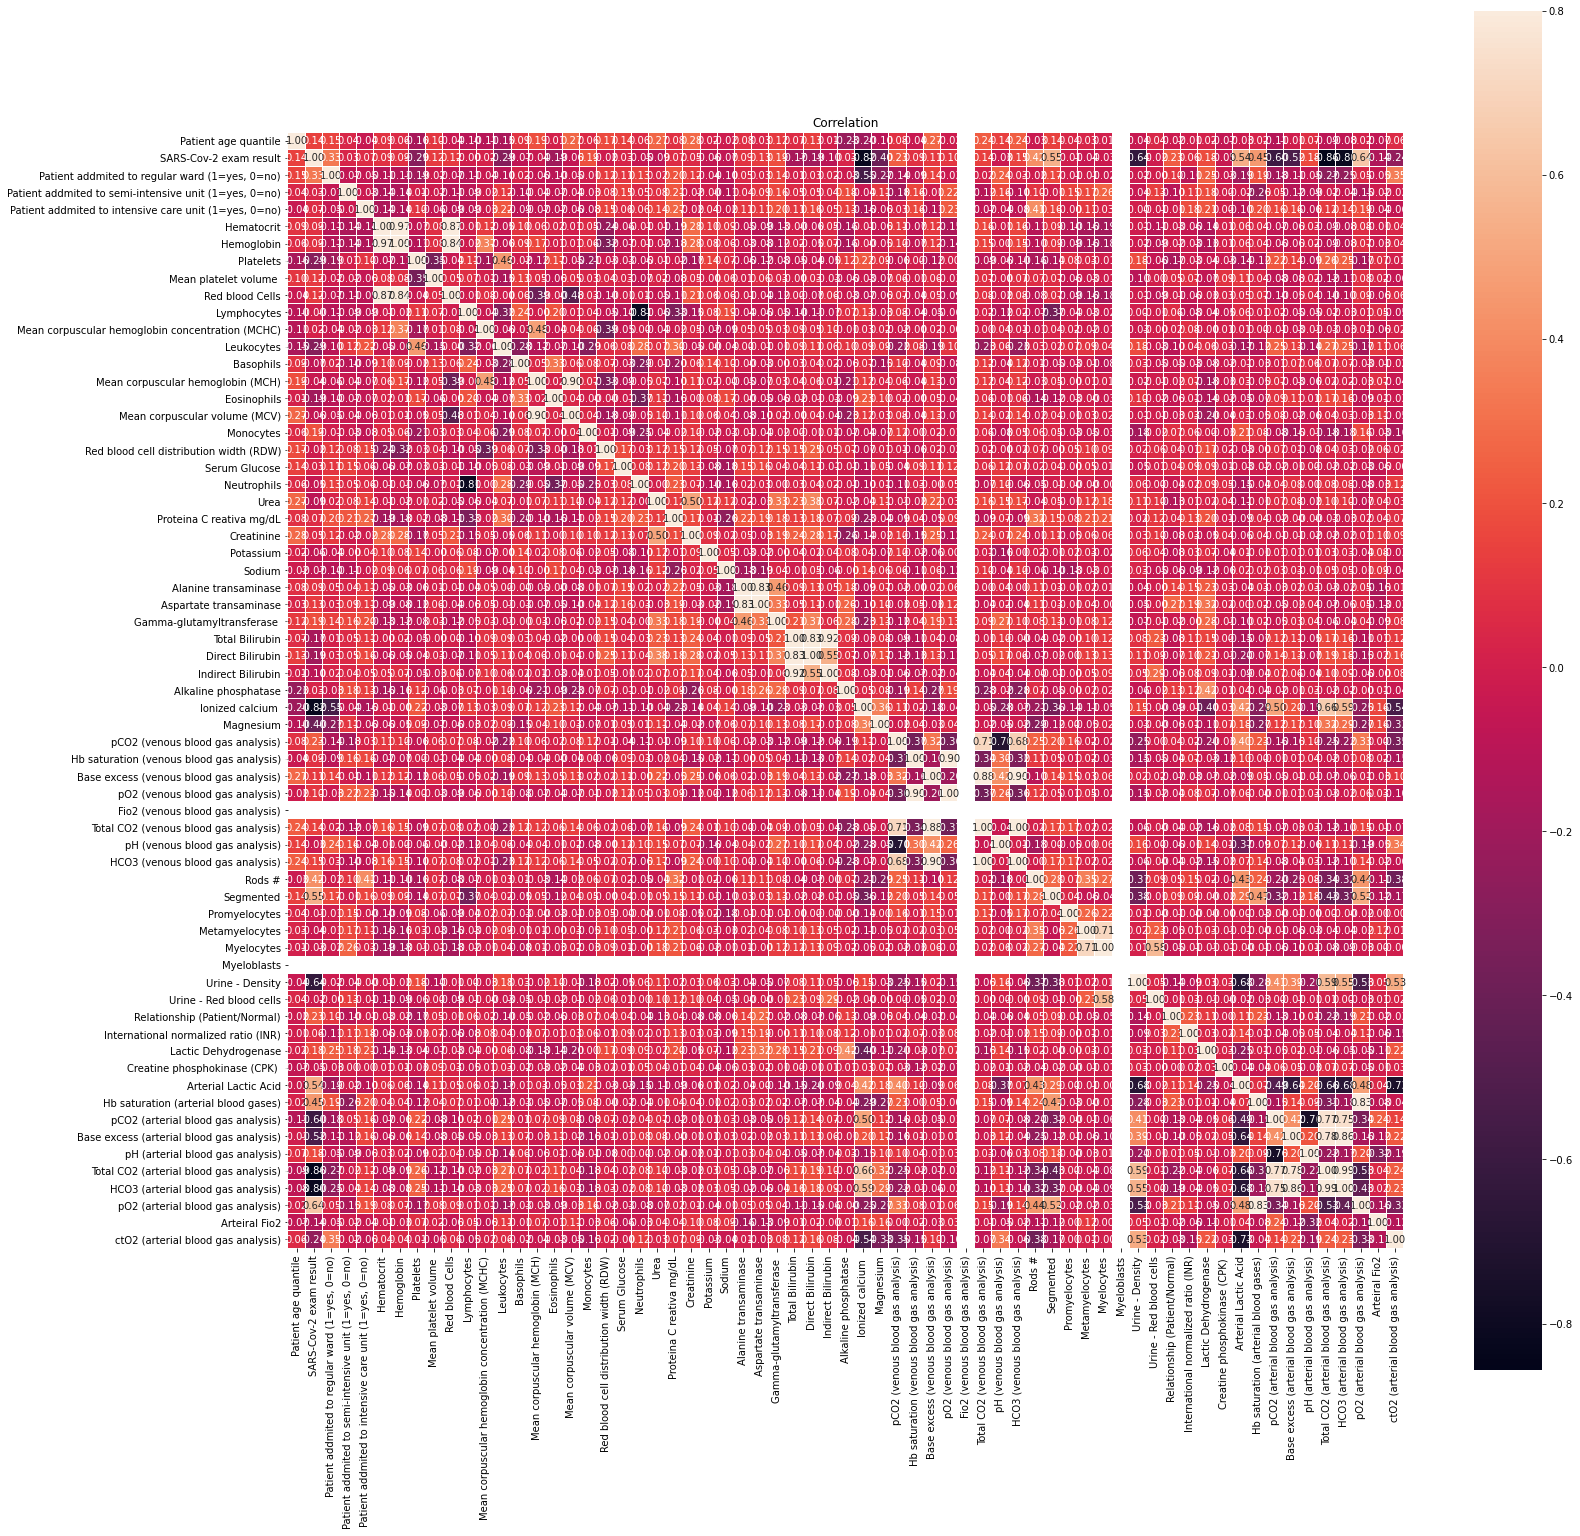

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(Covid_Input_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [ ]:
Covid_Input_df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,...,Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Arterial Lactic Acid,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,ctO2 (arterial blood gas analysis)
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.619086,1.198059,-0.147895,...,0.062103,-0.354086,0.0,0.088735,-0.090881,0.084804,-0.624373,-0.221924,-0.102062,-0.315965,-0.233126,0.0,0,3,6,0,0,0.087165,7,0,4000,-0.192874,0,0,0,9,-0.179955,-0.269317,-0.396721,-0.219362,0.229956,-0.373929,-0.202859,0.067946,0.197625,0.191474,0.097439,-0.528679,-0.011744,0.182693
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.127395,-0.067309,-0.286986,...,-0.283748,-0.562902,0.0,0.104088,-0.855513,0.036345,-0.624373,-0.221924,-0.102062,-0.315965,-0.233126,0.0,0,3,6,0,0,0.087165,7,0,4000,-0.192874,0,0,0,9,-0.089481,0.296546,0.907723,-0.267856,0.229956,-0.373929,-0.202859,0.067946,0.197625,0.191474,0.097439,-0.528679,-0.011744,0.182693
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,-0.307213,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.880570,-0.811643,-0.428064,...,0.062103,-0.354086,0.0,0.088735,-0.090881,0.084804,-0.624373,-0.221924,-0.102062,-0.315965,-0.233126,0.0,0,3,6,0,0,0.087165,7,0,4000,-0.192874,0,0,0,9,0.000994,-0.042972,-0.792007,-0.240915,0.229956,-0.373929,-0.202859,0.067946,0.197625,0.191474,0.097439,-0.528679,-0.011744,0.182693
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,-0.307213,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.265957,-0.141742,-0.487674,...,0.062103,-0.354086,0.0,0.088735,-0.090881,0.084804,-0.624373,-0.221924,-0.102062,-0.315965,-0.233126,0.0,0,3,6,0,0,0.087165,7,0,4000,-0.192874,0,0,0,9,-0.179955,-0.269317,-0.396721,-0.219362,0.229956,-0.373929,-0.202859,0.067946,0.197625,0.191474,0.097439,-0.528679,-0.011744,0.182693
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.8

In [136]:

Covid_Input_df.loc[:, Covid_Input_df.isnull().any()]

""
1
8
15
18
22
...
5258
5259
5540
5585


In [152]:
X = Covid_Input_df.drop(["SARS-Cov-2 exam result"],axis = 1)
Y = Covid_Input_df["SARS-Cov-2 exam result"]

Feature selection to improve accuracy

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

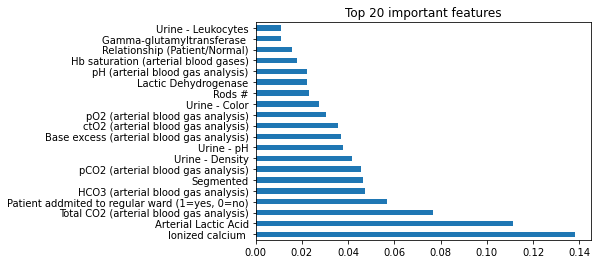

In [178]:
#plot graph of feature importances for better visualization
important_features  = pd.Series(model.feature_importances_, index=X.columns)
important_features.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()


In [171]:
#Split data in train & test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=20)

In [175]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [176]:
print(dt_model.score(X_train,Y_train))
print(dt_model.score(X_test, Y_test))

1.0
0.9978213507625272
